Load data and preprocess

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../data/laptops.csv")
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [3]:
df = df[['ram', 'storage', 'screen', 'final_price']]

In [4]:
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


### Question 1

There's one column with missing values. What is it?

In [5]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'ram'`?

In [6]:
df['ram'].describe()

count    2160.000000
mean       15.413889
std         9.867815
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

## Validation framework

In [7]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [8]:
df_train.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [9]:
y_train_orig = df_train.final_price.values
y_val_orig = df_val.final_price.values
y_test_orig = df_test.final_price.values

y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

## Linear Regression

In [10]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

## Baseline solution

In [11]:
def prepare_X(df):
    df = df.fillna(0)
    X = df.values
    return X

In [12]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [13]:
y_pred = w_0 + X_train.dot(w)

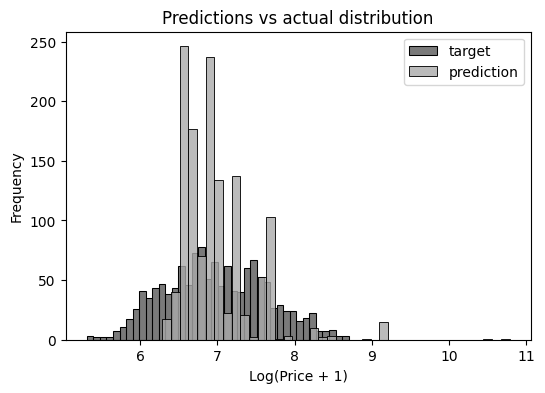

In [14]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [15]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [16]:
rmse(y_train, y_pred)

0.44632651855038796

In [17]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [18]:
round(rmse(y_val, y_pred), 2)

0.43

In [19]:
mean_value = df['screen'].mean()

In [20]:
def prepare_X_with_mean(df, mean_v):
    df = df.fillna(mean_v)
    X = df.values
    return X

### Retrain with filling empty values with mean()

In [21]:
X_train = prepare_X_with_mean(df_train, mean_value)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

In [22]:
X_val = prepare_X_with_mean(df_val, mean_value)
y_pred = w_0 + X_val.dot(w)

In [23]:
round(rmse(y_val, y_pred), 2)

0.43

Answer: filling with mean() values is the same as with zeros: round value of rmse is 0.43